<a href="https://colab.research.google.com/github/himanshudas13/StreamflowPrediction/blob/main/StreamVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

numberninja13_nethravathi_dataset_new_path = kagglehub.dataset_download('numberninja13/nethravathi-dataset-new')
numberninja13_svr1_tensorflow2_default_1_path = kagglehub.model_download('numberninja13/svr1/TensorFlow2/default/1')
numberninja13_svr3_tensorflow2_default_1_path = kagglehub.model_download('numberninja13/svr3/TensorFlow2/default/1')

print('Data source import complete.')


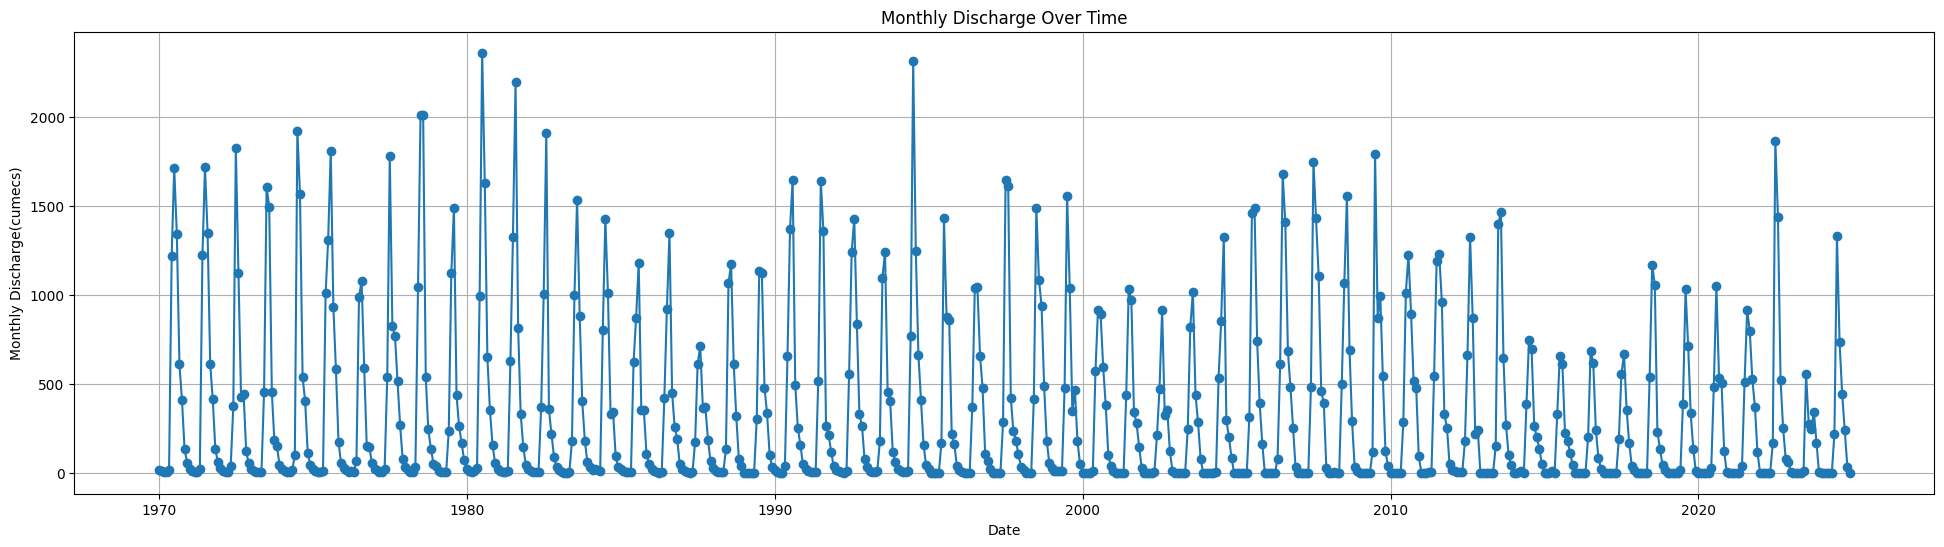

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/kaggle/input/nethravathi-dataset-new/Nethravathi Dataset.xlsx"
data = pd.read_excel(file_path)
data.sort_values('Date', inplace=True)

# Plot
plt.figure(figsize=(24, 6))
plt.plot(data['Date'], data['Streamflow (m3/s)'], marker='o', linestyle='-')
plt.title('Monthly Discharge Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Discharge(cumecs)')
plt.grid()
plt.show()

output_path = '/kaggle/working/streamflow_plot_monthly.png'
plt.savefig(output_path)

In [ ]:
print(list(data.columns))
df=data
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
print(list(df.columns))

['Date', 'Rainfall (mm)', 'Tmax_avg (oC)', 'Tmin_avg (oC)', 'T_mean (oC)', 'Streamflow (m3/s)']
['Date', 'Rainfall (mm)', 'Tmax_avg (oC)', 'Tmin_avg (oC)', 'T_mean (oC)', 'Streamflow (m3/s)', 'Month']


In [ ]:
lags = [1]
for lag in lags:
    df[f'Rainfall_lag{lag}'] = df['Rainfall (mm)'].shift(lag)
    df[f'Tmax_lag{lag}'] = df['Tmax_avg (oC)'].shift(lag)
#     # df[f'Tmin_lag{lag}'] = df['Tmin_avg (oC)'].shift(lag)

In [ ]:
df[f'Streamflow_prev-1']=df['Streamflow (m3/s)'].shift(1)
df[f'Streamflow_prev-3']=df['Streamflow (m3/s)'].shift(3)
df[f'Streamflow_prev-6']=df['Streamflow (m3/s)'].shift(6)
df[f'Streamflow_prev-12']=df['Streamflow (m3/s)'].shift(12)

In [ ]:
df[f'Streamflow_lag+1']=df['Streamflow (m3/s)'].shift(-1)
df[f'Streamflow_lag+3']=df['Streamflow (m3/s)'].shift(-3)
df[f'Streamflow_lag+6']=df['Streamflow (m3/s)'].shift(-6)
df[f'Streamflow_lag+12']=df['Streamflow (m3/s)'].shift(-12)

In [ ]:
print(list(df.columns))

['Date', 'Rainfall (mm)', 'Tmax_avg (oC)', 'Tmin_avg (oC)', 'T_mean (oC)', 'Streamflow (m3/s)', 'Month', 'Rainfall_lag1', 'Tmax_lag1', 'Streamflow_prev-1', 'Streamflow_prev-3', 'Streamflow_prev-6', 'Streamflow_prev-12', 'Streamflow_lag+1', 'Streamflow_lag+3', 'Streamflow_lag+6', 'Streamflow_lag+12']


In [ ]:
df = df.dropna()


In [ ]:
corr_matrix = df.corr()

# View correlation of Streamflow with all other variables
streamflow_corr = corr_matrix['Streamflow (m3/s)']

# Display results
# print("Correlation Matrix:\n", corr_matrix)
print("\nStreamflow Correlations:\n", streamflow_corr)


Streamflow Correlations:
 Date                 -0.094364
Rainfall (mm)         0.814042
Tmax_avg (oC)        -0.804032
Tmin_avg (oC)         0.285859
T_mean (oC)          -0.461775
Streamflow (m3/s)     1.000000
Month                 0.281197
Rainfall_lag1         0.846319
Tmax_lag1            -0.622624
Streamflow_prev-1     0.647118
Streamflow_prev-3    -0.151718
Streamflow_prev-6    -0.435798
Streamflow_prev-12    0.868558
Streamflow_lag+1      0.647177
Streamflow_lag+3     -0.151500
Streamflow_lag+6     -0.433691
Streamflow_lag+12     0.862594
Name: Streamflow (m3/s), dtype: float64


In [ ]:
# # features_to_drop = ['Month' ,'Tmin_avg (oC)', 'T_mean (oC)' , 'Date'  ]
# features_to_drop = [ 'Date'  ]
# df_new = df.drop(columns=features_to_drop)
# df_new=df.dropna()
# df_new.tail()
# df=df_new


In [ ]:
print(list(df.columns))

['Date', 'Rainfall (mm)', 'Tmax_avg (oC)', 'Tmin_avg (oC)', 'T_mean (oC)', 'Streamflow (m3/s)', 'Month', 'Rainfall_lag1', 'Tmax_lag1', 'Streamflow_prev-1', 'Streamflow_prev-3', 'Streamflow_prev-6', 'Streamflow_prev-12', 'Streamflow_lag+1', 'Streamflow_lag+3', 'Streamflow_lag+6', 'Streamflow_lag+12']


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
# Initialize the scalers
scaler_temp = StandardScaler()  # For temperature features
scaler_rainfall = MinMaxScaler()  # For rainfall features (or log-transform if you prefer)
scaler_streamflow = MinMaxScaler()


In [ ]:
# #MODEL-TYPE1 NAME: SVR01-a/b/c/d/e

# rainfall_features = df[['Rainfall (mm)']].values

# temp_features = df[['Tmax_avg (oC)', 'Tmin_avg (oC)']].values

# # streamflow_features = df[['Streamflow (m3/s)','Streamflow_lag+1','Streamflow_lag+3', 'Streamflow_lag+6', 'Streamflow_lag+12']].values
# streamflow_features = df[['Streamflow_lag+12']].values



In [ ]:
# MODEL-TYPE2 NAME SVR02-a/b/c/d/e

rainfall_features = df[['Rainfall (mm)','Rainfall_lag1']].values
temp_features = df[['Tmax_avg (oC)', 'Tmax_lag1']].values
streamflow_features = df[['Streamflow_lag+12']].values

In [ ]:
# # MODEL-TYPE3 NAME SVR03-a/b/c/d/e

# rainfall_features = df[['Rainfall (mm)','Rainfall_lag1']].values
# temp_features = df[['Tmax_avg (oC)', 'Tmax_lag1']].values
# stream_features=df[['Streamflow_prev-12','Streamflow_prev-1']].values

# streamflow_features = df[['Streamflow_lag+12']].values

In [ ]:
# Scale the features
scaled_temp = scaler_temp.fit_transform(temp_features)
scaled_rainfall = scaler_rainfall.fit_transform(rainfall_features)
# scaled_stream=scaler_streamflow.fit_transform(stream_features)
target_scaled=scaler_streamflow.fit_transform(streamflow_features)
#
features_scaled = np.hstack([scaled_rainfall, scaled_temp])
# features_scaled = np.hstack([scaled_rainfall, scaled_temp,scaled_stream])
# target_scaled =target_scaled.reshape(-1, 5)

dates = df['Date'].values


# print(features_scaled[:5])
# print(target_scaled[:5])

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# import numpy as np

# # Separate the features into different categories
# rainfall_features = df[['Rainfall (mm)', 'Rainfall_lag1']].values
# temp_features = df[['Tmax_avg (oC)', 'Tmax_lag1','Tmin_avg (oC)', 'T_mean (oC)']].values
# streamflow_features= df[['Streamflow (m3/s)']].values
# streamflow_features2= df[['Streamflow_lag1']].values

# # Initialize the scalers
# scaler_temp = StandardScaler()  # For temperature features
# scaler_rainfall = MinMaxScaler()  # For rainfall features (or log-transform if you prefer)
# scaler_streamflow = MinMaxScaler()

# # Scale the features
# scaled_temp = scaler_temp.fit_transform(temp_features)
# scaled_rainfall = scaler_rainfall.fit_transform(rainfall_features)
# target_scaled=scaler_streamflow.fit_transform(streamflow_features)
# scaled_flow=scaler_streamflow.fit_transform(streamflow_features2)

# # Combine the scaled features back together
# features_scaled = np.hstack([scaled_rainfall, scaled_temp,scaled_flow])

# # Get the target and dates
# target_scaled =target_scaled.reshape(-1, 1)
# dates = df['Date'].values

# # Now `scaled_features` contains your scaled input data, ready for modeling
# print(features_scaled[:5])  # Preview the first few rows of scaled features
# print(target_scaled[:5])

In [ ]:
train_size = int(len(target_scaled) * 0.8)
X_train, X_test = features_scaled[:train_size], features_scaled[train_size:]
y_train, y_test = target_scaled[:train_size], target_scaled[train_size:]
date_train, date_test = dates[:train_size], dates[train_size:]

In [ ]:
date_train.size

508

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler


In [ ]:
print(X_train.shape)
print(y_train.shape)

(508, 6)
(508, 1)


In [ ]:
svr = SVR()

param_grid = {
    'C': [0.01,0.1, 1, 10, 100,200],          # Regularization
    'epsilon': [0.001, 0.01, 0.1, 1], # Tolerance
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']        # Kernel coefficient
}

grid_search = GridSearchCV(svr, param_grid, cv=5,scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train[:, 0])

# Best Parameters & Model
best_svr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
best_svr.fit(X_train, y_train[:, 0])

SVR(C=1, epsilon=0.01, gamma='auto')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on Train Set
y_train_pred = best_svr.predict(X_train)

# Ensure y_train_pred is 2D before inverse transformation
y_train_pred = y_train_pred.reshape(-1, 1)

# Convert back to original scale (if y_train was scaled)
y_train_pred = scaler_streamflow.inverse_transform(y_train_pred).ravel()

# Metrics Calculation
mae = mean_absolute_error(y_train[:, 0], y_train_pred)  # Only first column is the target
rmse = np.sqrt(mean_squared_error(y_train[:, 0], y_train_pred))
r2 = r2_score(y_train[:, 0], y_train_pred)

print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}")


MAE: 334.950179084882, RMSE: 558.8652798236722, R²: -6858990.810340414


In [ ]:
predictions = best_svr.predict(X_test)

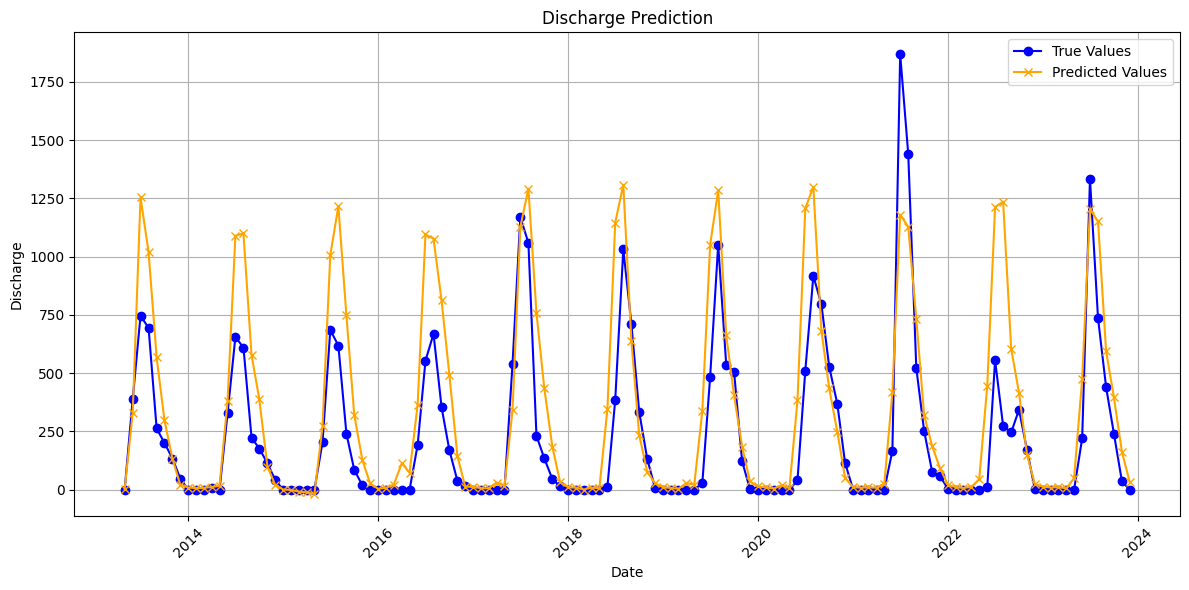

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Inverse transform y_test and predictions to get actual discharge values
y_test_actual = scaler_streamflow.inverse_transform(y_test.reshape(-1, 1))
predictions_actual = scaler_streamflow.inverse_transform(predictions.reshape(-1, 1))

# Convert date_test to a proper format if necessary
date_test = pd.to_datetime(date_test)

# Plot the actual and predicted values with dates on the x-axis
plt.figure(figsize=(12, 6))
plt.plot( date_test,y_test_actual, label='True Values', marker='o', color='blue')
plt.plot( date_test,predictions_actual, label='Predicted Values', marker='x', color='orange')
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.title('Discharge Prediction')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

predictions_actual = np.where(predictions_actual < 0, 0, predictions_actual)
# Calculate MAE
mae = mean_absolute_error(y_test_actual, predictions_actual)

# Calculate MSE
mse = mean_squared_error(y_test_actual, predictions_actual)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate NSE
numerator = np.sum((y_test_actual - predictions_actual) ** 2)
denominator = np.sum((y_test_actual - np.mean(y_test_actual)) ** 2)
nse = 1 - numerator / denominator

# Print metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"NSE: {nse}")


MAE: 150.91460190445173
MSE: 62280.70864030086
RMSE: 249.5610318946066
NSE: 0.48388655166661576


In [ ]:
import joblib

model_name = "SVR03-e.pkl"
joblib.dump(best_svr, model_name)  # Save the model


['SVR03-e.pkl']

In [ ]:
best_svr = joblib.load("/kaggle/working/SVR03-d.pkl")
print(best_svr.get_params())

{'C': 200, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.001, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
best_svr = joblib.load("/kaggle/working/SVR03-e.pkl")
print(best_svr.get_params())

{'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.001, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
